In [1]:
# Importovanie používaných knižníc

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# importovanie datasetu do premenej "Hawks_cleared"

Hawks_cleared = pd.read_csv("Hawks_cleared.csv")

In [3]:
# informácie o datasete

print("Počet riadkov: ", Hawks_cleared.shape[0])
print("Počet stĺpcov: ", Hawks_cleared.shape[1])
print("Názvy stĺpcov: ", Hawks_cleared.columns)

Počet riadkov:  300
Počet stĺpcov:  4
Názvy stĺpcov:  Index(['Wing length', 'Tail length', 'Weight', 'Species'], dtype='object')


In [4]:
# vypísanie prvých 10 riadkov datasetu pre ukážku

print("Prvých 10 riadkov datasetu:")
Hawks_cleared.head(10)

Prvých 10 riadkov datasetu:


,Wing length,Tail length,Weight,Species
0,233,191,324,0
1,252,230,340,0
2,240,192,340,0
3,271,232,475,0
4,233,186,340,0
5,260,220,420,0
6,265,224,365,0
7,239,182,223,0
8,236,185,390,0
9,223,210,550,0


In [5]:
# vypísanie posledných 10 riadkov datasetu pre ukážku

print("Posledných 10 riadkov datasetu:")
Hawks_cleared.tail(10)

Posledných 10 riadkov datasetu:


,Wing length,Tail length,Weight,Species
290,192,160,175,2
291,195,158,195,2
292,156,122,100,2
293,163,137,105,2
294,194,147,202,2
295,160,135,95,2
296,143,159,170,2
297,162,136,100,2
298,161,129,95,2
299,161,121,95,2


<function matplotlib.pyplot.show(close=None, block=None)>

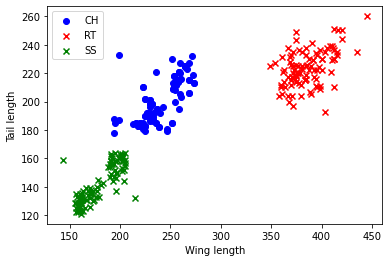

In [6]:
# na vizualizáciu používam knižnicu "matplotlib.pyplot", ktorú som si importoval na začiatku
# z knižnice použijem metódu "scatter", čo je bodový graf

# alokácia prvých 300 riadkov dataframu, uchovávam hodnoty prvých dvoch stĺpcov(wing a tail length)
x = Hawks_cleared.iloc[0:300,[0,1]].values  

plt.scatter(x[:100,0],x[:100,1],color='blue', label='CH')
plt.scatter(x[100:200,0],x[100:200,1],color='red', marker='x',label='RT')
plt.scatter(x[200:300,0],x[200:300,1],color='green', marker='x',label='SS')
plt.xlabel('Wing length')   #názov x-osi
plt.ylabel('Tail length')   #názov y-osi
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

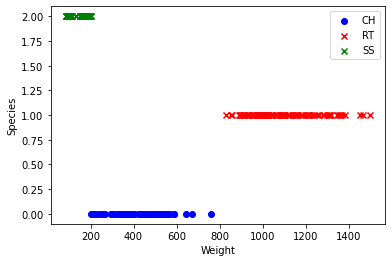

In [183]:
# alokácia prvých 300 riadkov dataframu, uchovávam hodnoty ďalších dvoch stĺpcov(váha a druh jastraba)
x = Hawks_cleared.iloc[0:300,[2,3]].values

plt.scatter(x[:100,0],x[:100,1],color='blue', label='CH')
plt.scatter(x[100:200,0],x[100:200,1],color='red', marker='x',label='RT')
plt.scatter(x[200:300,0],x[200:300,1],color='green', marker='x',label='SS')
plt.xlabel('Weight')   #názov x-osi
plt.ylabel('Species')   #názov y-osi
plt.legend()
plt.show

In [273]:
# definovanie paramtrov pre neurónovú sieť
# do premenej train_x(vstup) ukladám hodnoty z prvých troch stĺpcov(wing a tail length a weight)
# do premenej train_y(očakávaný výstup) hodnoty zo stĺpca "species"

train_x = Hawks_cleared.iloc[:,0:3].values
train_y = Hawks_cleared.iloc[:, 3].values

# prevedenie výstupu na kategorickú premennú
categorical = np_utils.to_categorical(train_y)

In [274]:
# prvý model neurónovej siete
# vstupné paramtre input_dim=3
# 3 skrýté vrstvy s 50 neurónmi
# na výtupe 3 neuróny
# Ako aktiváčnú funkciu pre všetky vrstvy som zvolil "sigmoid"

model = Sequential()
model.add(Dense(50, input_dim=3, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(3, activation = 'sigmoid'))

In [275]:
# nastavenie kompilácie modelu
# loss funkcia je 'mean_squared_error' a optimazér je 'sgd'

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [276]:
# Sieť nechám natrénovať a otestovať v cykle 10x, pričom hodnoty ukladám
# úspešnosti natrénovania siete do pola "hodnoty=[]"

n_batch = len(train_x) #nastavenie 
hodnoty=[]  

for _ in range(10):
    model.fit(train_x, categorical)
    scores = model.evaluate(train_x, categorical)
    print('-------------------------------------------------------------------------------------')
    hodnoty.append(scores[1]*100)

# vypisanie najlepšieho a najhoršieho skóre
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

10/10 [==============================] - 0s 554us/step - loss: 0.2696 - accuracy: 0.3333
-------------------------------------------------------------------------------------
10/10 [==============================] - 0s 550us/step - loss: 0.2638 - accuracy: 0.3333
-------------------------------------------------------------------------------------
10/10 [==============================] - 0s 554us/step - loss: 0.2584 - accuracy: 0.3333
-------------------------------------------------------------------------------------
10/10 [==============================] - 0s 554us/step - loss: 0.2538 - accuracy: 0.3333
-------------------------------------------------------------------------------------
10/10 [==============================] - 0s 554us/step - loss: 0.2498 - accuracy: 0.3333
-------------------------------------------------------------------------------------
10/10 [==============================] - 0s 446us/step - loss: 0.2462 - accuracy: 0.3333
------------------------------------

In [277]:
# kedže som dosiahol naozaj malú presnosť siete,
# zvýšením počtu epochs, dostanem lepší výsledok

hodnoty = []

for _ in range(10):
    model.fit(train_x, categorical, epochs=5)       #nastavenie počtu epóch
    scores = model.evaluate(train_x, categorical)
    print('-------------------------------------------------------------------------------------')
    hodnoty.append(scores[1]*100)

# vypisanie najlepšieho a najhoršieho skóre
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

Epoch 1/5
10/10 [==============================] - 0s 665us/step - loss: 0.2349 - accuracy: 0.3333
Epoch 2/5
10/10 [==============================] - 0s 665us/step - loss: 0.2332 - accuracy: 0.3333
Epoch 3/5
10/10 [==============================] - 0s 665us/step - loss: 0.2317 - accuracy: 0.3333
Epoch 4/5
10/10 [==============================] - 0s 665us/step - loss: 0.2305 - accuracy: 0.3333
Epoch 5/5
10/10 [==============================] - 0s 443us/step - loss: 0.2287 - accuracy: 0.3333
-------------------------------------------------------------------------------------
Epoch 1/5
10/10 [==============================] - 0s 669us/step - loss: 0.2283 - accuracy: 0.3333
Epoch 2/5
10/10 [==============================] - 0s 665us/step - loss: 0.2275 - accuracy: 0.3333
Epoch 3/5
10/10 [==============================] - 0s 665us/step - loss: 0.2267 - accuracy: 0.3333
Epoch 4/5
10/10 [==============================] - 0s 886us/step - loss: 0.2261 - accuracy: 0.3333
Epoch 5/5
10/10 [======

In [278]:
model2 = Sequential()
model2.add(Dense(100, input_dim=3, activation='sigmoid')) # vstupná vrstva
model2.add(Dense(100, activation='sigmoid'))              # skrytá vrstva
model2.add(Dense(100, activation='sigmoid'))              # skrytá vrstva
model2.add(Dense(3, activation = 'sigmoid'))              # vystupne neurony
model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
hodnoty=[]

for _ in range(50):
    # pocet epoch nastavime na 5
    model2.fit(train_x, categorical, epochs=5)
    scores = model.evaluate(train_x, categorical)
    hodnoty.append(scores[1]*100)
    
# vypisanie maximalneho a minimalneho skora uspesnosti siete
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

Epoch 1/5
10/10 [==============================] - 0s 665us/step - loss: 0.2950 - accuracy: 0.2948
Epoch 2/5
10/10 [==============================] - 0s 665us/step - loss: 0.2718 - accuracy: 0.3564
Epoch 3/5
10/10 [==============================] - 0s 665us/step - loss: 0.2686 - accuracy: 0.3298
Epoch 4/5
10/10 [==============================] - 0s 665us/step - loss: 0.2543 - accuracy: 0.3638
Epoch 5/5
10/10 [==============================] - 0s 554us/step - loss: 0.2210 - accuracy: 0.6633
Epoch 1/5
10/10 [==============================] - 0s 665us/step - loss: 0.2445 - accuracy: 0.3333
Epoch 2/5
10/10 [==============================] - 0s 665us/step - loss: 0.2393 - accuracy: 0.3333
Epoch 3/5
10/10 [==============================] - 0s 665us/step - loss: 0.2350 - accuracy: 0.3333
Epoch 4/5
10/10 [==============================] - 0s 776us/step - loss: 0.2319 - accuracy: 0.3333
Epoch 5/5
10/10 [==============================] - 0s 554us/step - loss: 0.2210 - accuracy: 0.6633
Epoch 1/5


In [284]:
def trenuj():
    # pocet epoch nastavime na 5
    history = model2.fit(train_x, categorical, epochs=20)
    scores = model.evaluate(train_x, categorical)
    return history

model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
historysgd = trenuj()

model2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
historyrmsprop = trenuj()

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
historyadam = trenuj()

model2.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy'])
historynadam = trenuj()

model2.compile(loss='mean_squared_error', optimizer='adagrad', metrics=['accuracy'])
historyadagrad = trenuj()

model2.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['accuracy'])
historyadadelta = trenuj()

model2.compile(loss='mean_squared_error', optimizer='adamax', metrics=['accuracy'])
historyadamax = trenuj()

Epoch 1/20
10/10 [==============================] - 0s 665us/step - loss: 0.0125 - accuracy: 0.9723
Epoch 2/20
10/10 [==============================] - 0s 662us/step - loss: 0.0137 - accuracy: 0.9710
Epoch 3/20
10/10 [==============================] - 0s 778us/step - loss: 0.0156 - accuracy: 0.9613
Epoch 4/20
10/10 [==============================] - 0s 776us/step - loss: 0.0105 - accuracy: 0.9854
Epoch 5/20
10/10 [==============================] - 0s 665us/step - loss: 0.0209 - accuracy: 0.9557
Epoch 6/20
10/10 [==============================] - 0s 665us/step - loss: 0.0178 - accuracy: 0.9643
Epoch 7/20
10/10 [==============================] - 0s 776us/step - loss: 0.0141 - accuracy: 0.9733
Epoch 8/20
10/10 [==============================] - 0s 665us/step - loss: 0.0187 - accuracy: 0.9604
Epoch 9/20
10/10 [==============================] - 0s 665us/step - loss: 0.0139 - accuracy: 0.9703
Epoch 10/20
10/10 [==============================] - 0s 776us/step - loss: 0.0115 - accuracy: 0.9820

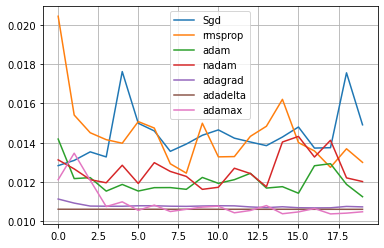

In [285]:
import matplotlib.pyplot as plt

plt.plot(historysgd.history['loss'], label="Sgd")
plt.plot(historyrmsprop.history['loss'], label="rmsprop")
plt.plot(historyadam.history['loss'], label="adam")
plt.plot(historynadam.history['loss'], label="nadam")
plt.plot(historyadagrad.history['loss'], label="adagrad")
plt.plot(historyadadelta.history['loss'], label="adadelta")
plt.plot(historyadamax.history['loss'], label="adamax")
plt.grid()
plt.legend()

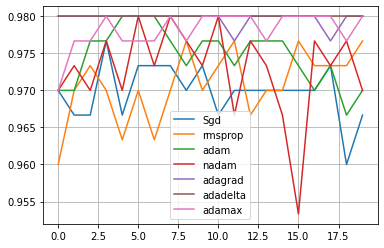

In [286]:
plt.plot(historysgd.history['accuracy'], label="Sgd")
plt.plot(historyrmsprop.history['accuracy'], label="rmsprop")
plt.plot(historyadam.history['accuracy'], label="adam")
plt.plot(historynadam.history['accuracy'], label="nadam")
plt.plot(historyadagrad.history['accuracy'], label="adagrad")
plt.plot(historyadadelta.history['accuracy'], label="adadelta")
plt.plot(historyadamax.history['accuracy'], label="adamax")
plt.grid()
plt.legend()

In [298]:
X = Hawks_cleared.iloc[:,[0,1,2]].values
y = Hawks_cleared.iloc[:, 3].values
categorical_y = np_utils.to_categorical(y)

In [299]:
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=3, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(units=3, activation='softmax'))

In [300]:
nn_model.compile(optimizer="adadelta", loss='categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X, categorical_y, epochs=100, validation_split=0.20, shuffle=True)
nn_scores = nn_model.evaluate(X, categorical_y)

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 5.5608 - accuracy: 0.4665 - val_loss: 0.0680 - val_accuracy: 1.0000
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.8713 - val_loss: 0.3881 - val_accuracy: 0.7667
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 0.9692 - val_loss: 0.0972 - val_accuracy: 0.9667
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9570 - val_loss: 0.4193 - val_accuracy: 0.7667
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1094 - accuracy: 0.9524 - val_loss: 0.1225 - val_accuracy: 0.9500
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1010 - accuracy: 0.9615 - val_loss: 0.2576 - val_accuracy: 0.8833
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0562 - accuracy: 0.9756 - val_loss: 0.3768 - val_accuracy: 0.8000
Epoch 8/100
8/8 [=========

In [301]:
print("Výsledné skóre testovania neurónovej sieťe: {:.2f}% ".format(nn_scores[1]*100))

Výsledné skóre testovania neurónovej sieťe: 96.00% 


In [302]:
import matplotlib.pyplot as plt

In [303]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

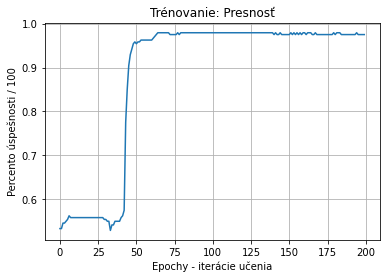

In [294]:
plt.plot(history.history['accuracy'])
plt.title("Trénovanie: Presnosť")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Percento úspešnosti / 100")
plt.grid()

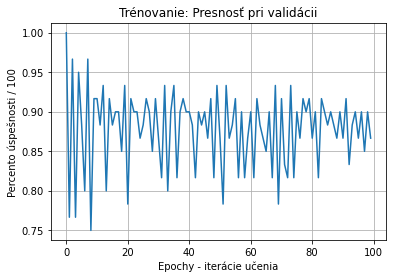

In [304]:
plt.plot(history.history['val_accuracy'])
plt.title("Trénovanie: Presnosť pri validácii")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Percento úspešnosti / 100")
plt.grid()

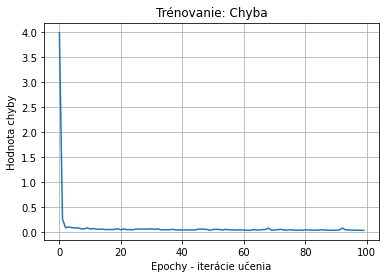

In [305]:
plt.plot(history.history['loss'])
plt.title("Trénovanie: Chyba")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Hodnota chyby")
plt.grid()

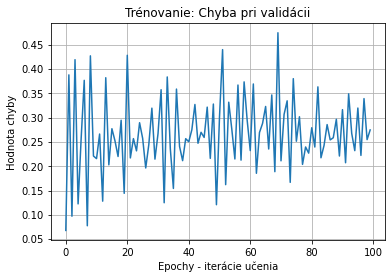

In [306]:
plt.plot(history.history['val_loss'])
plt.title("Trénovanie: Chyba pri validácii")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Hodnota chyby")
plt.grid()